In [ ]:
#Multiplying the masks and raw data together

In [6]:
#save Ram from exploding
#Begone memory
def memory():
    def Begone_memory(exceptions=None):
        if exceptions is None:
            exceptions = []

        for var in list(globals().keys()):
            if var not in exceptions:
                del globals()[var]
    Begone_memory()
    def Begone_memory(exceptions=None):
        if exceptions is None:
            exceptions = []

        for var in list(globals().keys()):
            if var not in exceptions:
                del globals()[var]
memory()
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
import numpy as np

In [3]:
loaded_raw_15_percent = np.load(f"A:/3rd_Year_Project/Project_code/data/Loaded_Raw_Data/15_percent/saved_15_percent.npy")
loaded_raw_2nd = np.load(f"A:/3rd_Year_Project/Project_code/data/Loaded_Raw_Data/2nd_light/saved_2ndlight.npy")
loaded_mask_15_percent = np.load(r"A:\3rd_Year_Project\Project_code\data\Masks_Data\Numpy format\15_percent_masks.npy")
loaded_mask_2nd = np.load(r"A:\3rd_Year_Project\Project_code\data\Masks_Data\Numpy format\2nd_light_masks.npy")

crop_size = 128
cropped = []

def pad_to_shape(array, target_shape=(128, 128)):
    padded_array = np.zeros(target_shape, dtype=array.dtype)
    h, w = array.shape
    padded_array[:h, :w] = array  # Copy original data into the padded array
    return padded_array

for framenumber in range(loaded_mask_15_percent.shape[0]):
    maskdata = loaded_mask_15_percent[framenumber, :, :]  # Correct way to join paths
    # Identify unique regions in mask
    regions = np.unique(np.asarray(maskdata))
    
    for region in regions[1:]:  # Skip background (assuming it's region 0)
        tempmask = maskdata == region
        label_img = label(tempmask)
        region_props = regionprops(label_img)
    
        if region_props:  # Ensure there is a valid region
            positions = region_props[0].centroid#

            frame_image = loaded_raw_15_percent[framenumber, :, :]  # Read the image
            maskeddata = np.multiply(frame_image, tempmask)  # Apply mask to #image data#
    
            x, y = int(positions[0]), int(positions[1])

           #Handle potential out-of-bounds errors when cropping
            x_min = max(0, x - crop_size // 2)
            x_max = min(maskdata.shape[0], x_min + crop_size)
            y_min = max(0, y - crop_size // 2)
            y_max = min(maskdata.shape[1], y_min + crop_size)

            cropped_data = maskeddata[x_min:x_max, y_min:y_max]

            #image = imread(cropped_data, as_gray=True)

            cropped.append(pad_to_shape(cropped_data))
                
            #plt.imshow(cropped_data, cmap='gray')  # If it is image-like, e.g., grayscale
            #plt.show()

np.save(r"A:\3rd_Year_Project\Project_code\data\final_data\15_percent.npy", cropped)

In [6]:
cropped1 = []
loaded_mask_2nd = np.load(r"A:\3rd_Year_Project\Project_code\data\Masks_Data\Numpy format\2nd_light_masks.npy")
loaded_raw_2nd = np.load(f"A:/3rd_Year_Project/Project_code/data/Loaded_Raw_Data/2nd_light/saved_2ndlight.npy")
def pad_to_shape(array, target_shape=(128, 128)):
    padded_array = np.zeros(target_shape, dtype=array.dtype)
    h, w = array.shape
    padded_array[:h, :w] = array  # Copy original data into the padded array
    return padded_array

for framenumber in range(loaded_mask_2nd.shape[0]):
    maskdata = loaded_mask_2nd[framenumber, :, :]  # Correct way to join paths
    # Identify unique regions in mask
    regions = np.unique(np.asarray(maskdata))

    for region in regions[1:]:  # Skip background (assuming it's region 0)
        tempmask = maskdata == region
        label_img = label(tempmask)
        region_props = regionprops(label_img)

        if region_props:  # Ensure there is a valid region
            positions = region_props[0].centroid#
            #
            frame_image = loaded_raw_2nd[framenumber, :, :]  # Read the image
            maskeddata = np.multiply(frame_image, tempmask)  # Apply mask to #image data#

            x = int(positions[0])
            y = int(positions[1])


            #Handle potential out-of-bounds errors when cropping
            x_min, x_max = max(0, x - 64), min(maskdata.shape[0], x + 64)
            y_min, y_max = max(0, y - 64), min(maskdata.shape[1], y + 64)#

            cropped_data = maskeddata[x_min:x_max, y_min:y_max]
            cropped1.append(pad_to_shape(cropped_data))

            #plt.imshow(cropped_data, cmap='gray')  # If it is image-like, e.g., grayscale
            #plt.show()

np.save(r"A:\3rd_Year_Project\Project_code\data\final_data\2nd_light.npy", cropped1)

In [3]:
frogs = np.load(r"A:\3rd_Year_Project\Project_code\data\final_data\2nd_light.npy")
print(frogs.shape)

toads = np.load(r"A:\3rd_Year_Project\Project_code\data\final_data\15_percent.npy")
print(toads.shape)

(8461, 128, 128)
(12619, 128, 128)


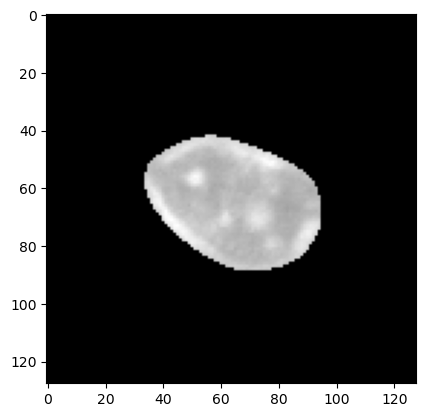

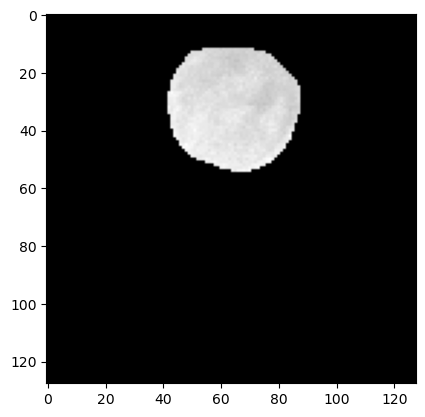

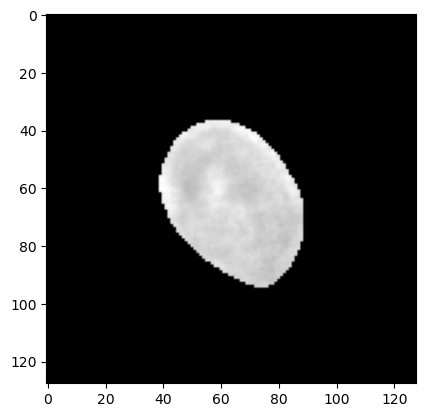

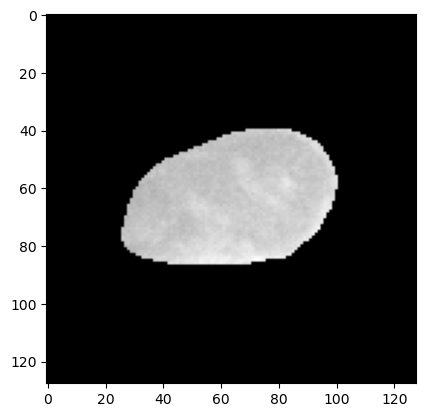

In [5]:
for i in range(2):
    plt.imshow(toads[i], cmap='gray')
    plt.show()

    plt.imshow(frogs[i], cmap='gray')
    plt.show()